Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two   months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

- PAY_2: Repayment status in August, 2005 (scale same as above)

- PAY_3: Repayment status in July, 2005 (scale same as above)

- PAY_4: Repayment status in June, 2005 (scale same as above)

- PAY_5: Repayment status in May, 2005 (scale same as above)

- PAY_6: Repayment status in April, 2005 (scale same as above)

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

- default.payment.next.month: Default payment (1=yes, 0=no)



![](1.png)

In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import (metrics, linear_model, preprocessing)
import warnings
warnings.filterwarnings("ignore")

In [297]:
pd.options.mode.chained_assignment = None

path='credit_card_defaults(UCI).xls'
pdexcel = pd.ExcelFile(path)
print (pdexcel.sheet_names)
df = pdexcel.parse("Data" , skiprows = 1) # i used skiprows = 1 here since DF was Multi Indexed

print (df.shape)
df.head()

['Data']
(30000, 25)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [299]:
# make copies of df
df1 = df.copy()

In [300]:
df2 = df.copy()

# <a id="7">EDA</a>

# Check The Data

In [270]:
#Check the shape of the DF
print("Credit Card Fraud Detection data -  rows:",df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection data -  rows: 30000  columns: 25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# Check Missing Data

In [5]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [271]:
# Check % of missing Data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

default  PAY_6  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  \
Total        0.0    0.0        0.0  0.0        0.0       0.0  0.0    0.0   
Percent      0.0    0.0        0.0  0.0        0.0       0.0  0.0    0.0   

         PAY_2  PAY_3  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
Total      0.0    0.0  ...        0.0        0.0        0.0        0.0   
Percent    0.0    0.0  ...        0.0        0.0        0.0        0.0   

         PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5   ID  
Total         0.0       0.0       0.0       0.0       0.0  0.0  
Percent       0.0       0.0       0.0       0.0       0.0  0.0  

[2 rows x 25 columns]

In [6]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

Observation : 30000 transactions were made between April and September

In [8]:
# check for duplicates
display(df.duplicated().sum())
print(df.duplicated(keep = 'first').any())

0

False


# Visualize DataFrame and Stats

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

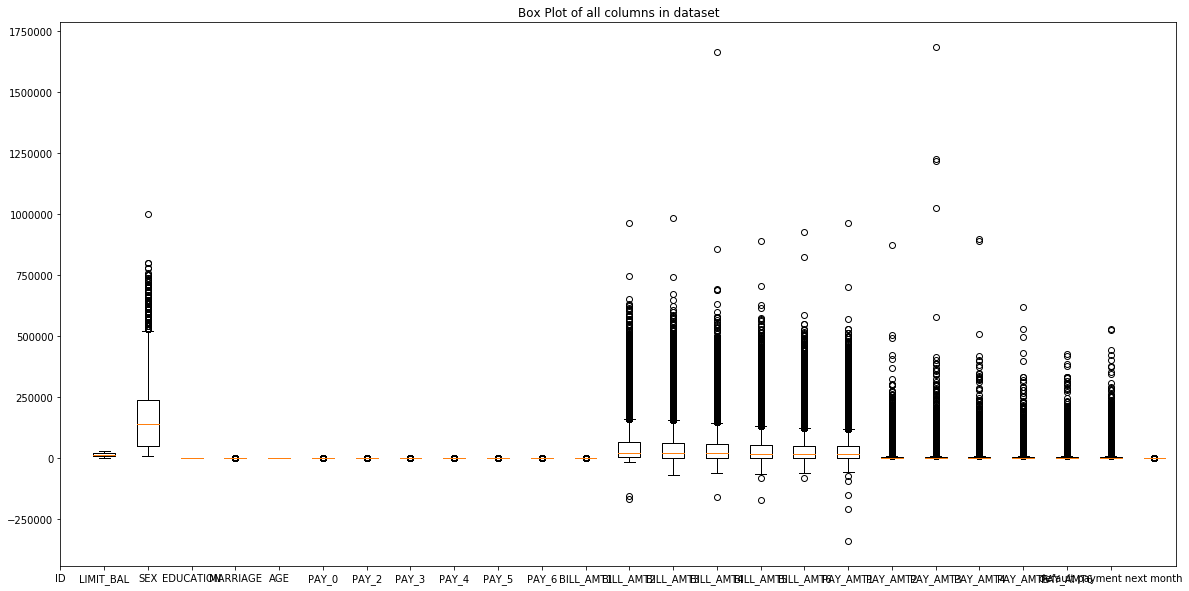

In [10]:
display(df.describe())

# Create a box plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box Plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()

# Checking for Categorical and Numerica Columns

In [13]:
cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
cat_cols

[]

In [ ]:
Observation : Data has no categorical columns

In [24]:
num_cols = list(df._get_numeric_data().columns)
num_cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default_payment_next_month']

# lets check on the target column

In [16]:
df.iloc[:,-1]

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [43]:
df[['default payment next month']]

default payment next month
0                               1
1                               1
2                               0
3                               0
4                               0
...                           ...
29995                           0
29996                           0
29997                           1
29998                           1
29999                           1

[30000 rows x 1 columns]

# lets tidy up column name for easy manipulation

In [44]:
df.columns = df.columns.map(lambda x : x.replace(" ", "_"))

In [19]:
df.iloc[:,-1]

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64

In [45]:
# check result
df[['default_payment_next_month']]

default_payment_next_month
0                               1
1                               1
2                               0
3                               0
4                               0
...                           ...
29995                           0
29996                           0
29997                           1
29998                           1
29999                           1

[30000 rows x 1 columns]

# Heatmap to Check the correlation between variables

In [46]:
target = 'default_payment_next_month'

In [22]:
import seaborn as sns

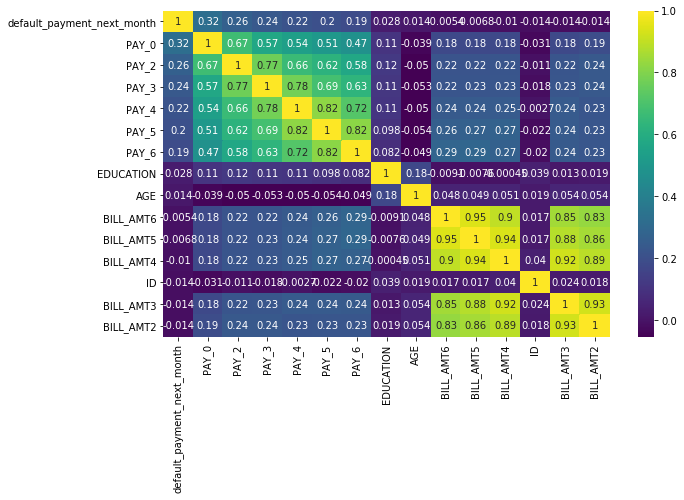

In [25]:
k = 15
cols = df[num_cols].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize = (10,6))
sns.heatmap(cm , annot = True , cmap = 'viridis')

In [ ]:
# Observations :


In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [309]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [310]:
df.rename(columns = {'default payment next month' : 'default'}, inplace = True)

In [311]:
df0 = df.copy()

In [312]:
df1 = df.copy()

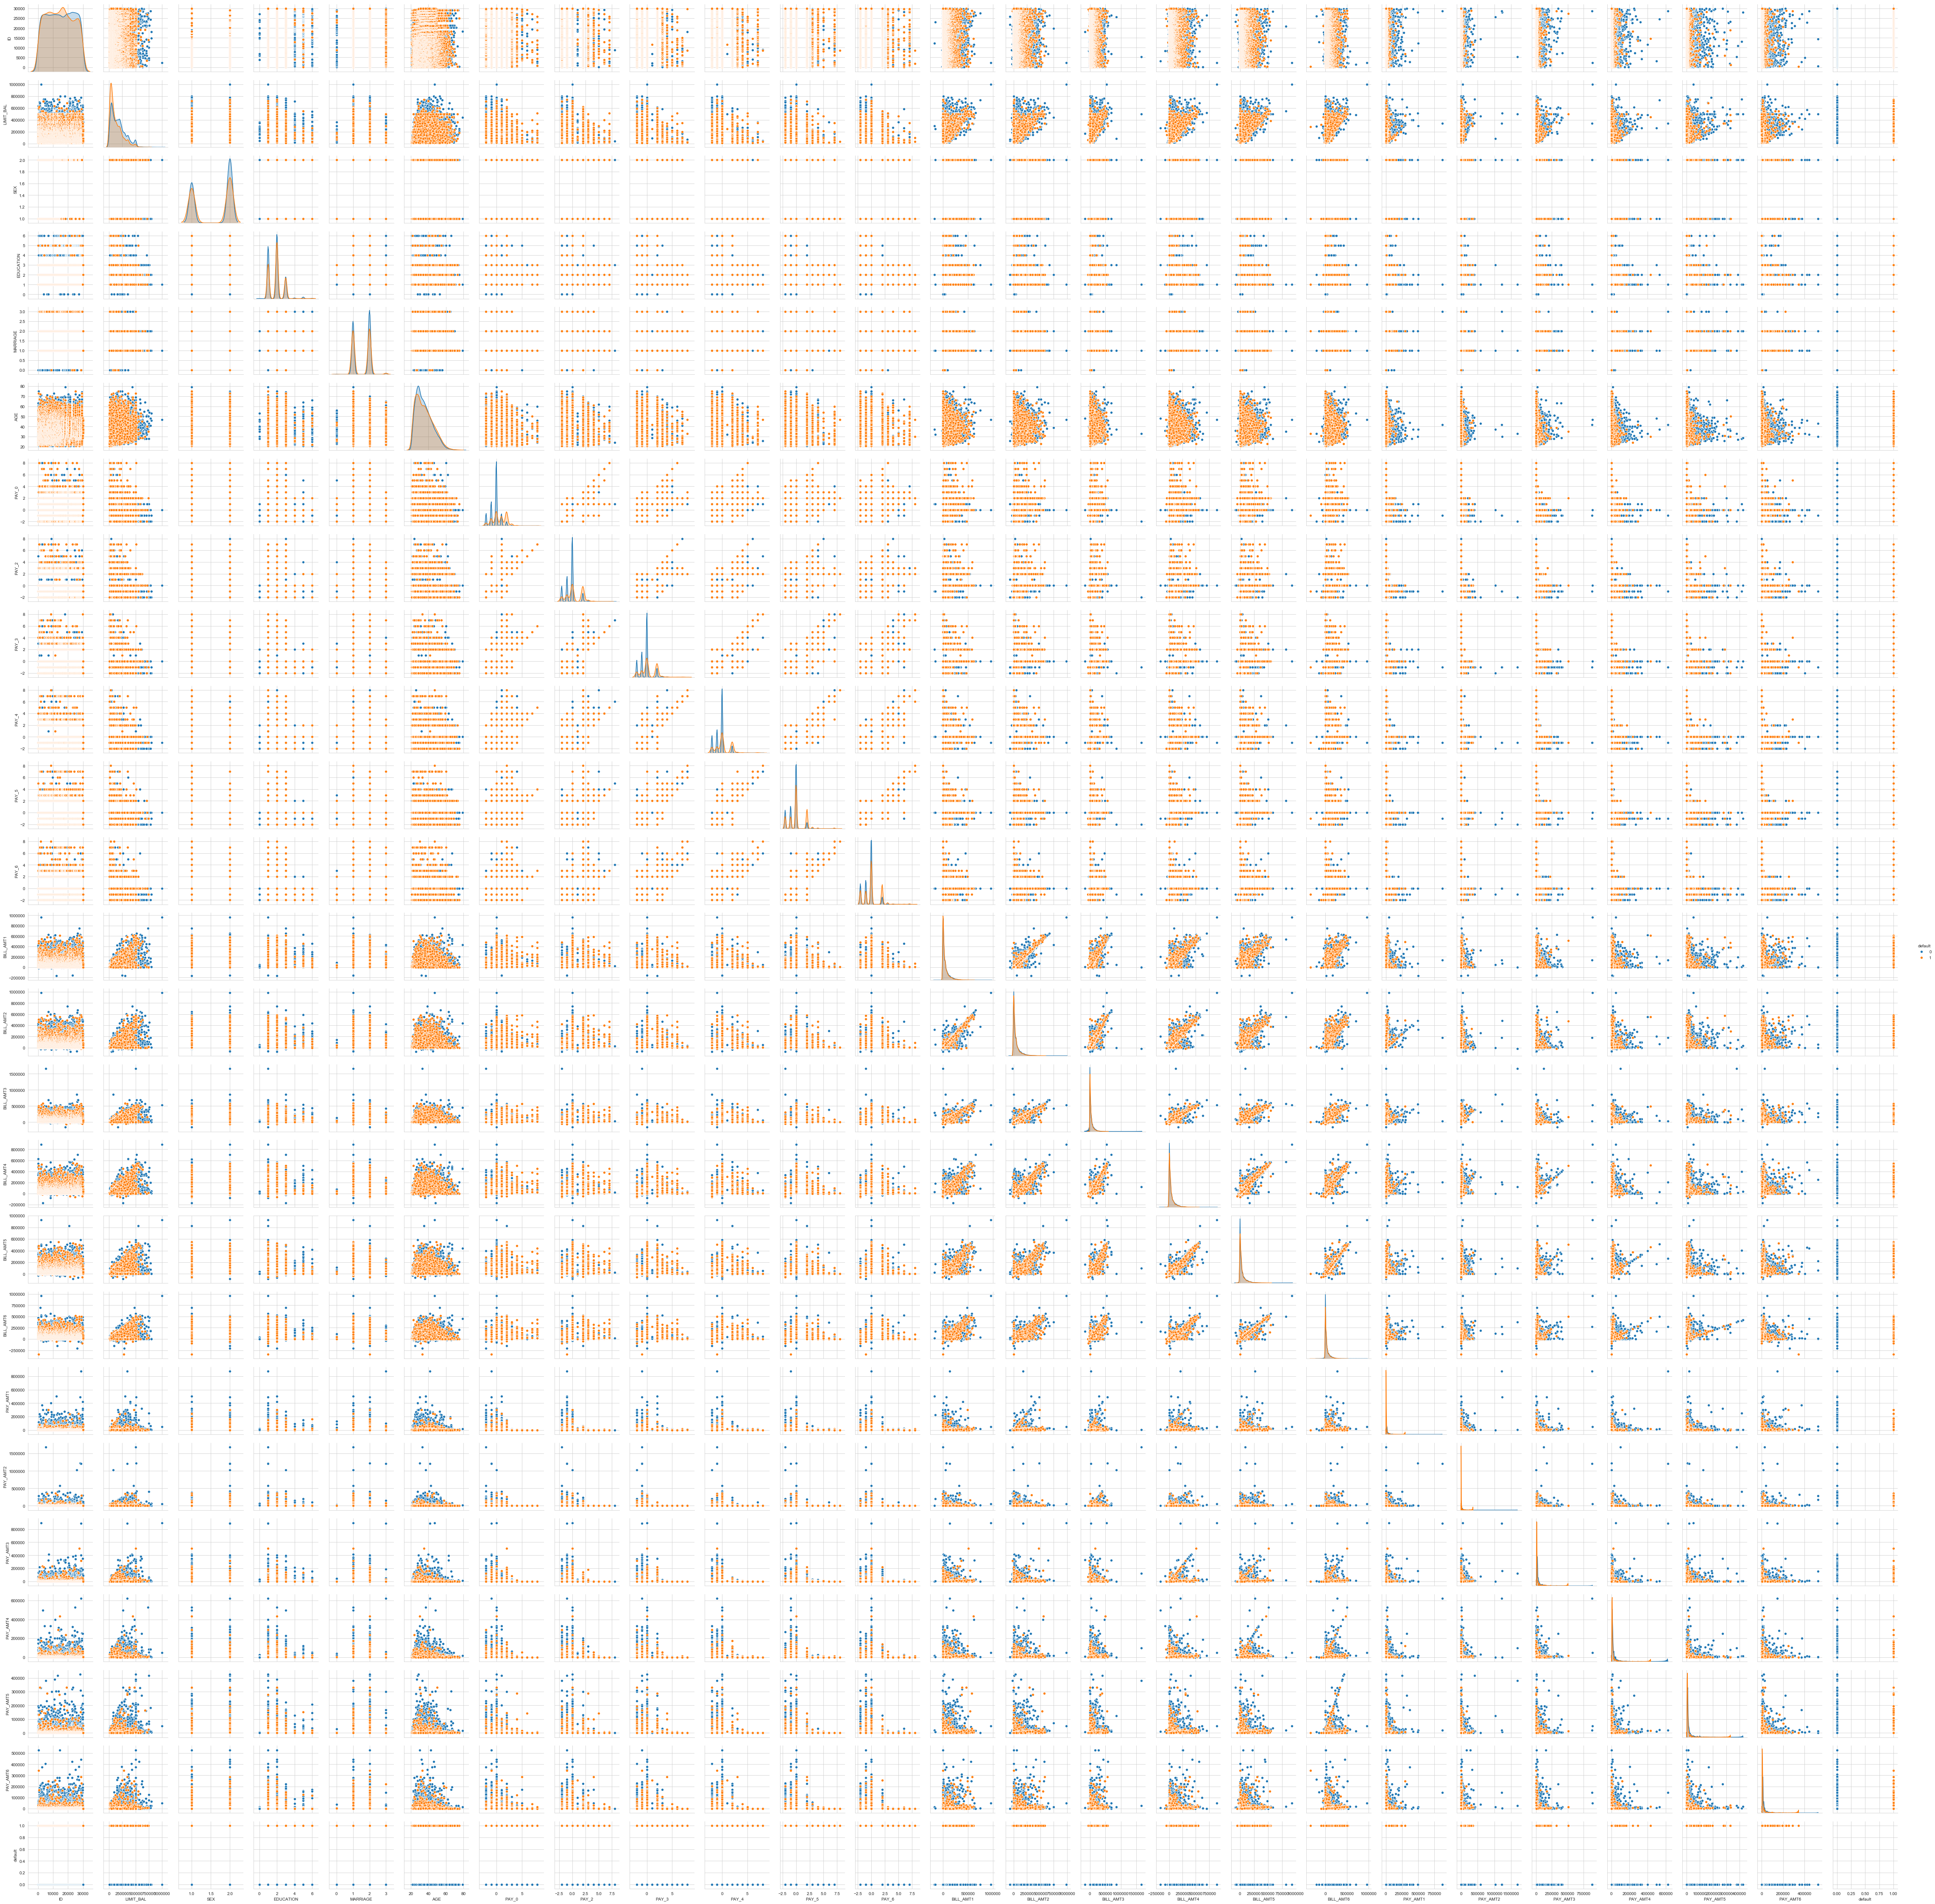

In [268]:
sns.pairplot(df, hue = 'default')

In [306]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# <a id="7">Feature Density Plot</a>

<Figure size 432x288 with 0 Axes>

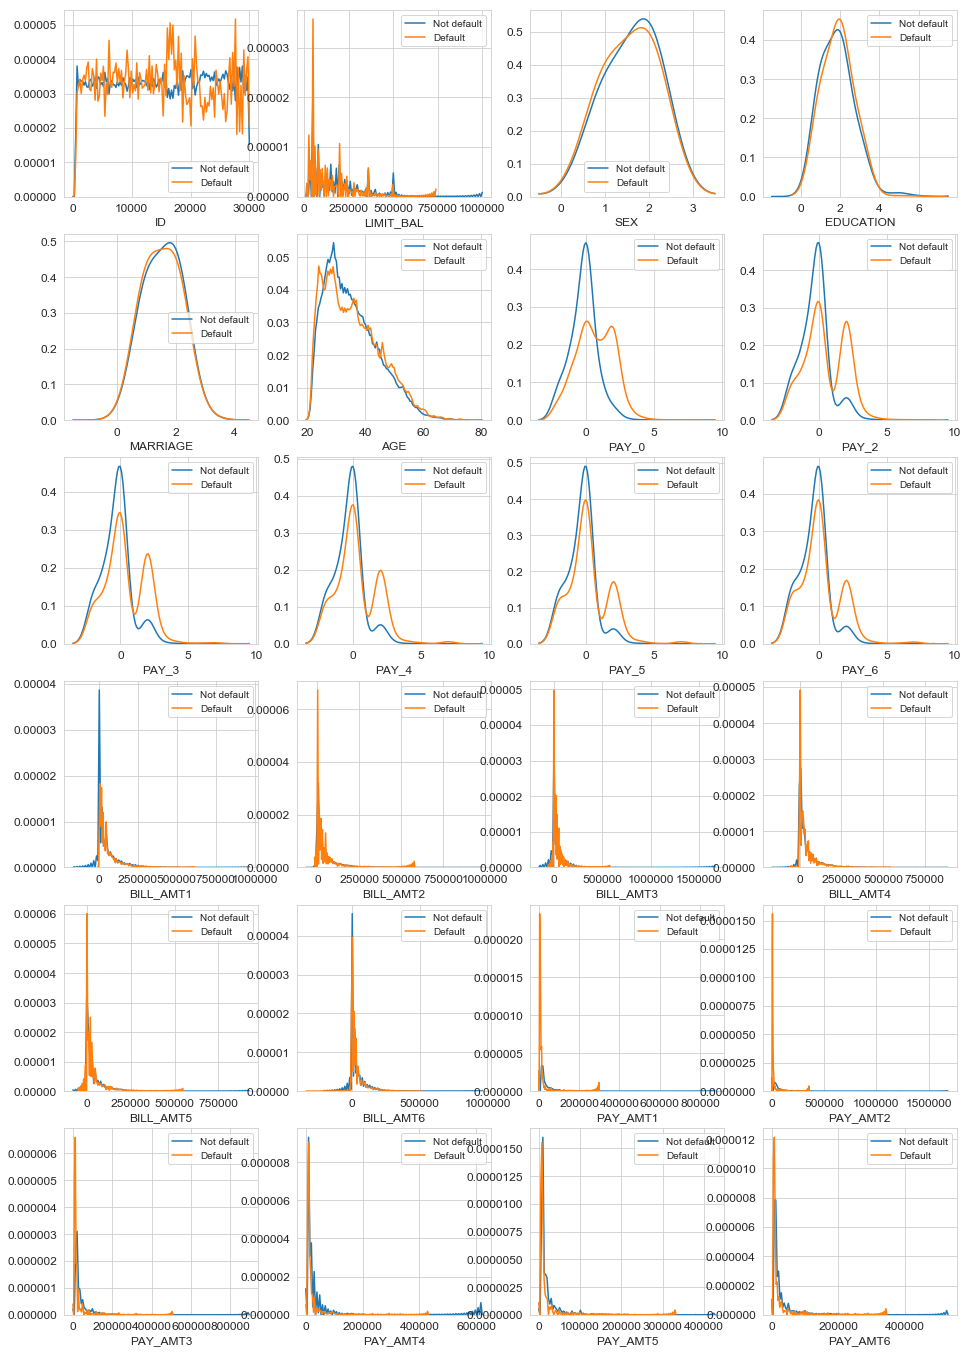

In [316]:
features = [f for f in df.columns if f not in ['default']]
target = [x for x in df['default']]

i = 0
t0 = df[df['default'] == 0]
t1 = df[df['default'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(6,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Not default")
    sns.kdeplot(t1[feature], bw=0.5,label="Default")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

<Figure size 432x288 with 0 Axes>

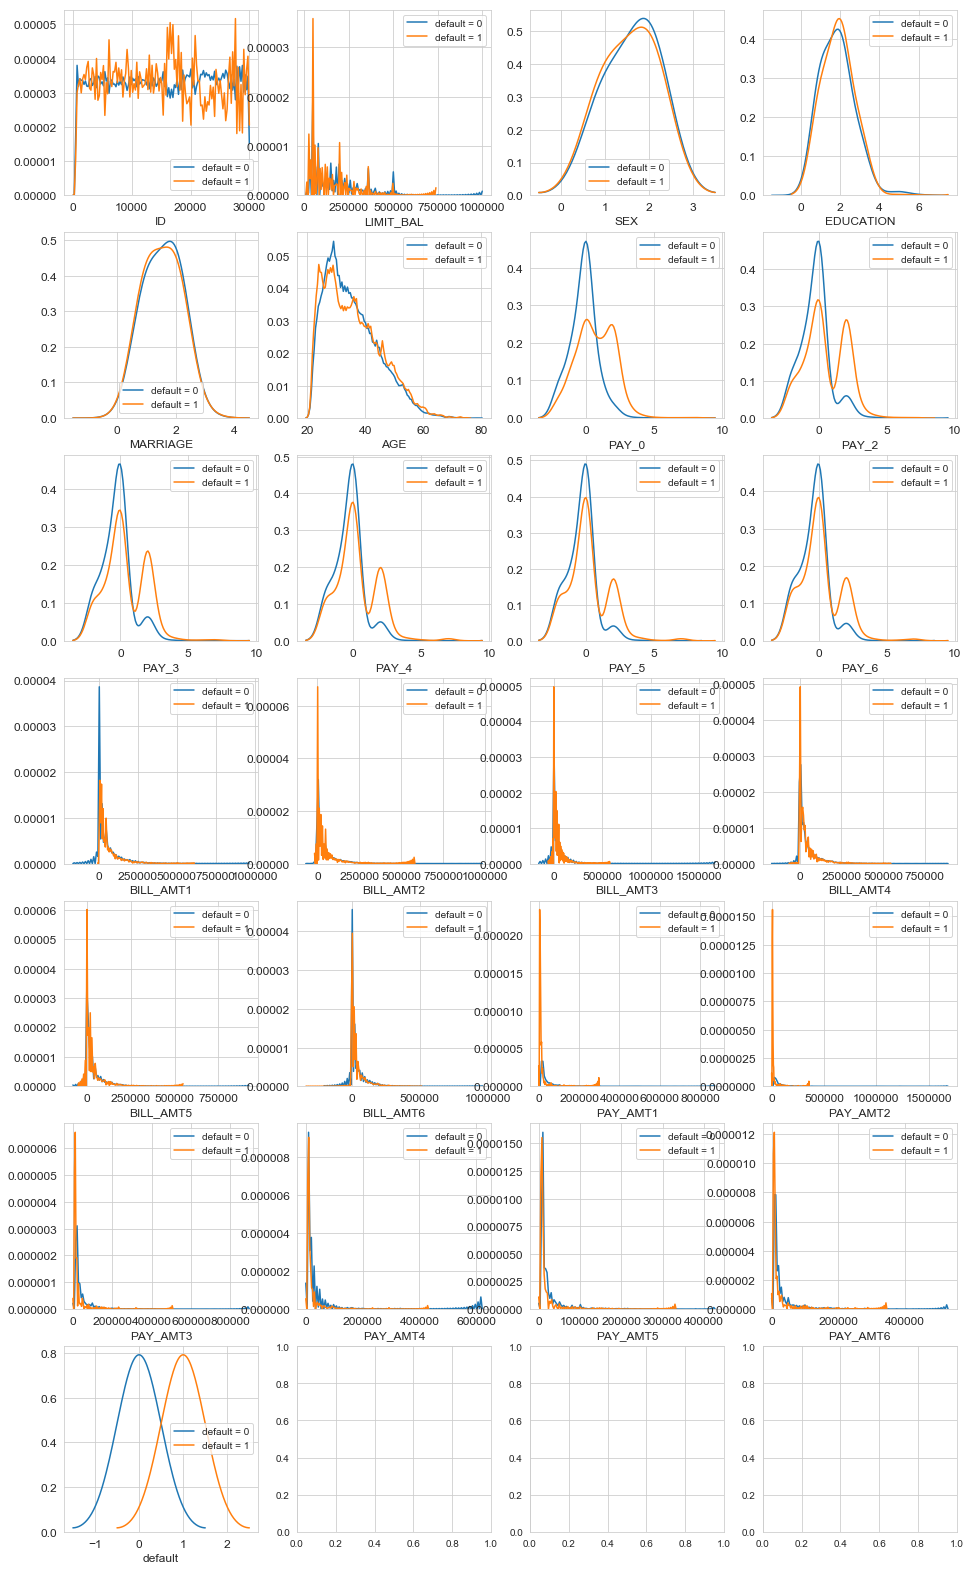

In [267]:
var = df.columns.values

i = 0
t0 = df.loc[df['default'] == 0]
t1 = df.loc[df['default'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5, label='default = 0')
    sns.kdeplot(t1[feature], bw=0.5, label='default = 1')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both' , which='major', labelsize=12)
plt.show();    


# Check for highly correlated features

In [31]:
used = []
corrs = []
for i, j in enumerate(df.corr().columns):
    for k in range(len(df.corr())):
        if ((df.corr().iloc[k, i] > 0.9) &
            (j not in used) &
            (j != df.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df.corr().index[k],
                         np.round(df.corr().iloc[k, i], 2)))
        
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                       [i[1] for i in corrs],
                       [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column', 1:'row', 2:'corr'})
corrsdf[:15]

column        row  corr
0  BILL_AMT1  BILL_AMT2  0.95
1  BILL_AMT2  BILL_AMT1  0.95
2  BILL_AMT3  BILL_AMT2  0.93
3  BILL_AMT4  BILL_AMT3  0.92
4  BILL_AMT5  BILL_AMT4  0.94
5  BILL_AMT6  BILL_AMT4   0.9

In [318]:
not_default = df[df["default"] == 0]
default= df[df["default"] == 1]

In [319]:
default

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
13        14      70000    1          2         2   30      1      2      2   
16        17      20000    1          1         2   24      0      0      2   
21        22     120000    2          2         1   39     -1     -1     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29991  29992     210000    1          2         1   34      3      2      2   
29994  29995      80000    1          2         2   34      2      2      2   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
13         0  ...      66782      36137      36894      3200         0   
16         2  ...      18338      17905      19104      3200         0   
21        -1  ...          0        632        316       316       316   
...      ...  ...        ...        ...        ...       ...       ...   
29991      2  ...       2500       2500       2500         0         0   
29994      2  ...      77519      82607      81158      7000      3500   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0             0         0         0         0        1  
1          1000      1000         0      2000        1  
13         3000      3000      1500         0        1  
16         1500         0      1650         0        1  
21            0       632       316         0        1  
...         ...       ...       ...       ...      ...  
29991         0         0         0         0        1  
29994         0      7000         0      4000        1  
29997     22000      4200      2000      3100        1  
29998      1178      1926     52964      1804        1  
29999      1430      1000      1000      1000        1  

[6636 rows x 25 columns]

# Amount of Credit Limit

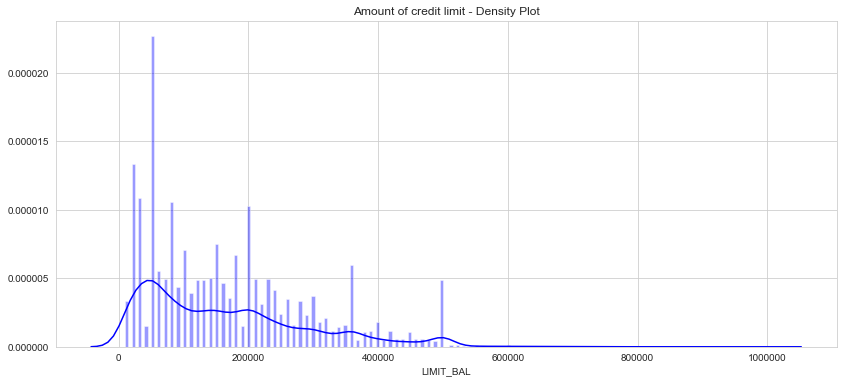

In [327]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

# Observation : 
Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.

In [331]:
df['LIMIT_BAL'].value_counts().shape

(81,)

Note : There are 81 distinct credit limits available

In [332]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

# Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

# Visualisation of Limit Balance Amount Distribution

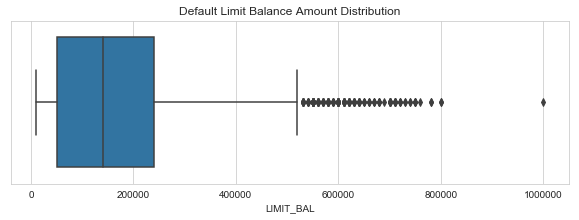

In [333]:
plt.figure(figsize = (10,3))
plt.title("Limit Balance Amount Distribution")
ax = sns.boxplot(x = df['LIMIT_BAL'])

# Visualisation of Limit Balance Amount Distribution for Default Transactions

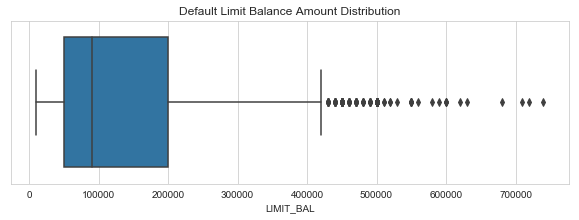

In [330]:
plt.figure(figsize = (10,3))
plt.title("Default Limit Balance Amount Distribution")
ax = sns.boxplot(x = default['LIMIT_BAL'])

In [ ]:
# default.LIMIT_BAL.value_counts().plot(kind = "bar")

In [ ]:
# not_default.LIMIT_BAL.value_counts().plot(kind = "bar")

# Data Unbalance

Note : Here i changed to use the copy of the dataframes cos i dont want to reuse this df . I could have continued to use
    it but i didnt want to. Since 

In [350]:
df_new = df.copy()

In [345]:
df_new

default  values
0        0   23364
1        1    6636

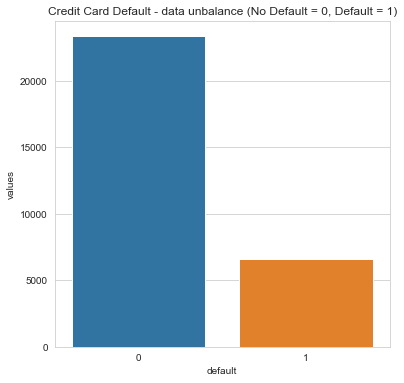

In [351]:
temp = df_new["default"].value_counts()
df_new = pd.DataFrame({'default': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Credit Card Default - data unbalance (No Default = 0, Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default', y="values", data=df_new)
locs, labels = plt.xticks()
plt.show()

# Sex, Education, Age and Marriage


Let's show sex, education, age and marriage distributions.

We start by showing the boxplots with age distribution grouped by marriage status and sex.

Marriage status meaning is:

* 0 : unknown (let's consider as others as well)
* 1 : married
* 2 : single
* 3 : others

Sex meaning is:

* 1 : male
* 2 : female


In [405]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="Blues",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

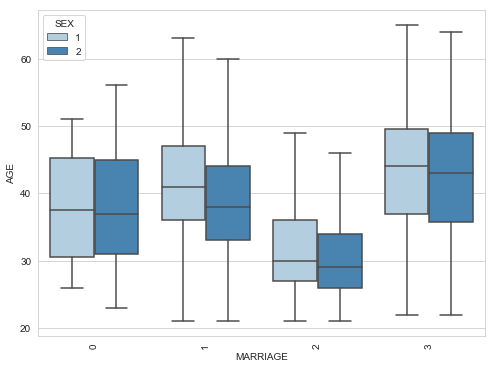

In [406]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly widowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.

Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.


Let's show the boxplots with age distribution grouped by education and marriage.

Education status meaning is:

* 1 : graduate school
* 2 : university
* 3 : high school
* 4 : others
* 5 : unknown
* 6 : unknow


# <a id="7">Preprocessing</a>

In [32]:
# lower case for all cols
# df.rename(columns = lambda x : x.lower() , inplace = True)

In [51]:
# another way to use for loop to iterate through columns to lowercase
new_cols = [col.lower() for col in df0.columns]
df0.columns = new_cols

In [52]:
df0.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

# Base Values : female , other education , not married

In [53]:
df0['grad_school'] = (df0['education'] == 1).astype('int')
df0['university'] = (df0['education'] == 2).astype('int')
df0['high_school'] = (df0['education'] == 3).astype('int')
df0.drop('education' , 1 , inplace = True)

In [54]:
df0['male'] = (df0['sex'] == 1).astype('int')
df0.drop('sex' , 1 , inplace = True)

df0['married'] = (df0['marriage'] == 1).astype('int')
df0.drop('marriage' , 1 , inplace = True)

In [59]:
# for pay features if its less than or equal to <= 0 , then it means it was not delayed
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    df0.loc[df0[p] <= 0 , p] = 0

In [61]:
# Rename Target column
df.rename(columns = {'default_payment_next_month' : 'default'} , inplace = True)

In [62]:
# I used the robust scaler to rescale all the features
robust_scaler = RobustScaler()

# More EDA To Come...

# Building Models Using All Features - Sklearn

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix , precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [63]:
target = 'default'
X = df.drop('default' , 1)
X = robust_scaler.fit_transform(X)
y = df[target]

# <a id="7">Train Test Split</a>

In [64]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 123 , stratify = y)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 24)
(6000, 24)
(24000,)
(6000,)


# Base Function

In [67]:
def base_func(element):
    #train and fit the model
    model = element()
    model.fit(X_train , y_train)
    
    #predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    #evaluation
    train_accuracy = roc_auc_score(y_train , train_preds)
    test_accuracy = roc_auc_score(y_test , test_preds)
    
    print(str(element))
    print("--------------------------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100) :.4}%")
    print(f"Test Accuracy : {(test_accuracy * 100) :.4}%")
    
    #Store accuracy in a new DataFrame
    score_logreg = [element , train_accuracy , test_accuracy]
    print("------------------------------------------------")
    models = pd.DataFrame([score_logreg])    

In [338]:
def run_model2(model, X_train, y_train,X_test, y_test ):
    model.fit(X_train, y_train)

    # predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # evaluate
    train_accuracy = roc_auc_score(y_train, train_preds)
    test_accuracy = roc_auc_score(y_test, test_preds)
    report = classification_report(y_test, test_preds)

    #print confusion matrix
    cnf_matrix = confusion_matrix(y_test , test_preds)
    print("Confusion Matrix:\n" , cnf_matrix)

  #print reports of the model accuracy
    print('Model Scores')
    print("------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100):.4}%")
    print(f"Test Accuracy:     {(test_accuracy * 100):.4}%")
    print("------------------------------------------------------")
    print('Classification Report : \n', report)
    print("-----------------------------------------------------")
    print("Confusion Matrix:\n" , cnf_matrix)

# <a id="7">Running 4 Models From Function</a>

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
algorithms = [RandomForestClassifier , LogisticRegression , DecisionTreeClassifier , GaussianNB]

for element in algorithms:
    base_func(element)

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
--------------------------------------------
Training Accuracy: 95.47%
Test Accuracy : 63.14%
<class 'sklearn.linear_model.logistic.LogisticRegression'>
--------------------------------------------
Training Accuracy: 60.55%
Test Accuracy : 60.33%
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
--------------------------------------------
Training Accuracy: 100.0%
Test Accuracy : 59.96%
<class 'sklearn.naive_bayes.GaussianNB'>
--------------------------------------------
Training Accuracy: 69.31%
Test Accuracy : 70.25%


# Create Confusion Matrix

In [71]:
def Conf_Matrix(CM , labels = ['pay','default']):
    df0 = pd.DataFrame(data = CM , index = labels, columns = labels)
    df0.index.name = 'True'
    df0.columns.name = "Precision"
    df0.loc['Total'] = df0.sum()
    df0['Total'] = df0.sum(axis = 1)
    return df0

# Preparing DF for Model analysis

In [72]:
metrics = pd.DataFrame(index = ['accuracy','precision','recall'],
                      columns = ['RandomForest', 'Null','LogisticReg','DecisionTree','NaiveBayes'])

# Defining Important Concepts

### Accuracy :
   - The proportion of the total number of predictions that are correct.

### Precision :

   - The proportion of positive predictions that are actually correct . It is the ability of a classifier not to label
     an instance as positive when it is actually negative. 
   
   ` For each class ut us defined as the ratio of true positives to the sum of true and false positives`.
   
   - It could simply be explained as "for all instances classified positive , what percentage was actually correct. 

### Recall :
 - The proportion of positively observed values correctly predicted as such . 
 - It is the ability of a classifier to find all positive instances . Thus for each class it is defined as the ratio
   of true negatives to the sum of true positives and false negatives.

# Note : In This Application 

**Accuracy**
- Overall , how often the model predicts correctly defaulters or non-defaulters.

**Precision**
- How often is the model correct when it predicts default.

**Recall**
- The proportion of actual defaulters that the model will correctly predict as such

# Important Metrics to be used 

**False Positive**
- A person who will pay predicted as a defaulter.

**False Negative**
- A person who defaults predicted as payer

# Note :


## False Negatives are worse and also we should look out for a better recall

In [ ]:
logReg = LogisticRegression(n_jobs = -1 , random_state = 15)
logReg.fit(X_train , y_train)

# Baseline Model

In [337]:
rf_model = RandomForestClassifier(n_jobs = -1 , random_state = 15)
rf_model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [ ]:
def run_model2(model, X_train, y_train,X_test, y_test ):


In [339]:
run_model2(rf_model , X_train , y_train , X_test , y_test)

Confusion Matrix:
 [[4430  257]
 [ 904  409]]
Model Scores
------------------------
Training Accuracy: 95.6%
Test Accuracy:     62.83%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      4687
           1       0.61      0.31      0.41      1313

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.72      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000

-----------------------------------------------------
Confusion Matrix:
 [[4430  257]
 [ 904  409]]


# <a id="7">The Null Model</a>
- Always predicts the most common category

In [76]:
y_pred_test = np.repeat(y_train.value_counts().idxmax() , y_test.size)

metrics.loc['accuracy','Null'] = accuracy_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['precision','Null'] = precision_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['recall','Null'] = recall_score(y_pred = y_pred_test , y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test , y_true = y_test)
Conf_Matrix(CM)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision   pay  default  Total
True                           
pay        4673        0   4673
default    1327        0   1327
Total      6000        0   6000

# Observations: 

# <a id="7">Logistic Regression</a>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [77]:
logReg = LogisticRegression(n_jobs = -1 , random_state = 15)
logReg.fit(X_train , y_train) # using training data to train estimator

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=15, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
predicted = logReg.predict(X_test)

In [85]:
actual = y_test

In [86]:
from sklearn import metrics
print(metrics.classification_report(actual , predicted))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4673
           1       0.74      0.23      0.35      1327

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.78      0.60      0.62      6000
weighted avg       0.80      0.81      0.77      6000



# <a id="7">Confusion Metrics</a>

In [93]:
# Print confusion matrix
cnf_matrix = confusion_matrix(actual, predicted)
print('Confusion Matrix:\n', cnf_matrix)


Confusion Matrix:
 [[4564  109]
 [1022  305]]


# Lets Create A DataFrame For The Confusion Matrix :

In [82]:
"""evaluate the model"""
y_pred_test = logReg.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred = y_pred_test ,y_true = y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred = y_pred_test , y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test , y_true = y_test)
Conf_Matrix(CM)

Precision   pay  default  Total
True                           
pay        4564      109   4673
default    1022      305   1327
Total      5586      414   6000

In [116]:
def conf_mat(actual, predicted):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(actual):
        pred = predicted[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_mat(actual, predicted)


{'TP': 305, 'TN': 4564, 'FP': 109, 'FN': 1022}

In [142]:
# Create the basic matrix
def plot_confusion_matrix(cnf_matrix,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    

    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

"""Add title and axis labels"""    
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

"""Add appropriate axis scales"""
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

""" Add labels to each cell"""
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
"""Here we iterate through the confusion matrix and append labels to our visualization"""
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
            horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

"""Add a legend"""
    plt.colorbar()
    plt.show()

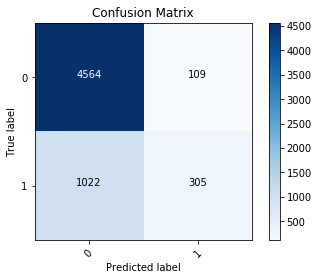

In [143]:
plot_confusion_matrix(cnf_matrix)

# <a id="7">Explain Results of Confusion Matrix :</a>

- It is used to describe the performance of a classification model on a set of test data for which the true values are known.
- It helps understand Type 1(FP) and Type II errors (FN)

In [146]:
conf_mat(actual, predicted)

{'TP': 305, 'TN': 4564, 'FP': 109, 'FN': 1022}

TP : 305 cases were actual default and they were classified right.

TN : 4564 cases were people who payers and were classified as defaulters.

FP : 109 cases were wrongly classified as defualters but were classified as payers.

FN : 1022 cases were people who defaulted and were classified as payers.

# updated confusion matrix with labels

In [230]:
def plot_confusion_matrix1(cnf_matrix, classes = class_names ,normalize=False,
                          title='Confusion matrix',
                          class_names = ['Non Default' , 'Default'], 
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
#   print(cnf_matrix)

    plt.imshow(cnf_matrix, cmap=cmap)
    
    """Add title and axis labels""" 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    """Add appropriate axis scales"""
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    
    """Text formatting"""
    fmt = '.2f' if normalize else 'd'
    """Add labels to each cell"""
    thresh = cnf_matrix.max() / 2.
    """Here we iterate through the confusion matrix and append labels to our visualization""" 
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')
    
    """Add a legend"""
    plt.colorbar()
    plt.show() 


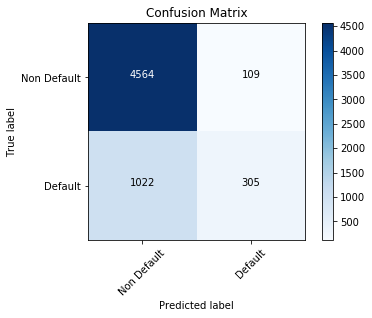

In [231]:
plot_confusion_matrix1(cnf_matrix)


# <a id="7">ROC CURVE For Logistic Regression</a>

# AUC Score for Logistic Regression

In [254]:
roc_auc_score(actual, predicted)

0.6032581307325783

In [280]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=42)

In [282]:
from sklearn.metrics import roc_auc_score
def scores(model,X_train,X_val,y_train3,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    train = roc_auc_score(y_train,train_prob)
    val = roc_auc_score(y_val,val_prob)
    print('train:',round(train,2),'test:',round(val,2))

In [283]:
def annot(fpr,tpr,thr):
    k=0
    for i,j in zip(fpr,tpr):
        if k %50 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

In [285]:
from sklearn.metrics import roc_curve
def roc_plot(model,X_train,y_train,X_val,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

In [286]:
def opt_plots(opt_model):
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')
#     return opt

In [289]:
features = X
target = y

In [292]:
model = logReg

In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=.2,random_state=42)


train: 0.72 test: 0.72


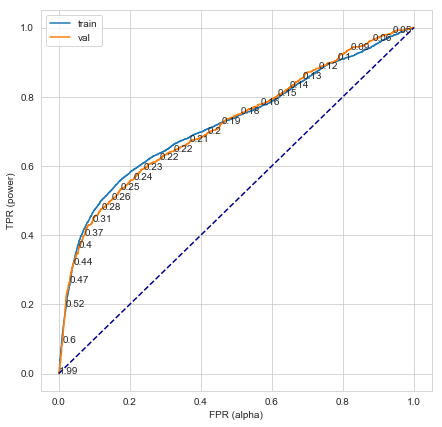

In [291]:
scores(logReg , X_train , X_val , y_train , y_val)
roc_plot(logReg , X_train , y_train , X_val , y_val)

 
# <a id="7">Decision Tree Classifier :</a>

In [259]:
from sklearn.tree import DecisionTreeClassifier

In [378]:
predicted = class_tree.predict(X_test)
actual = y_test

In [261]:
# create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split = 30 , min_samples_leaf = 10 , random_state = 10)

class_tree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [352]:
run_model2(class_tree , X_train ,y_train , X_test , y_test )

Confusion Matrix:
 [[4214  473]
 [ 839  474]]
Model Scores
------------------------
Training Accuracy: 74.94%
Test Accuracy:     63.0%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      4687
           1       0.50      0.36      0.42      1313

   micro avg       0.78      0.78      0.78      6000
   macro avg       0.67      0.63      0.64      6000
weighted avg       0.76      0.78      0.77      6000

-----------------------------------------------------
Confusion Matrix:
 [[4214  473]
 [ 839  474]]


In [379]:
To Be Deleted
# predicted = logReg.predict(X_test)
# actual = y_test

from sklearn import metrics
print(metrics.classification_report(actual , predicted))

# Print confusion matrix
cnf_matrix = confusion_matrix(actual, predicted)
print('Confusion Matrix:\n', cnf_matrix)


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4687
           1       0.50      0.36      0.42      1313

   micro avg       0.78      0.78      0.78      6000
   macro avg       0.67      0.63      0.64      6000
weighted avg       0.76      0.78      0.77      6000

Confusion Matrix:
 [[4214  473]
 [ 839  474]]


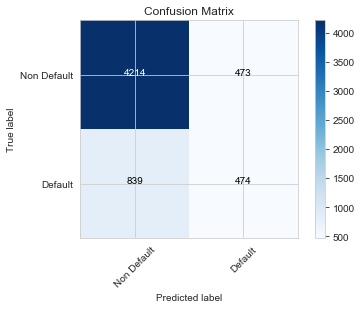

In [389]:
plot_confusion_matrix1(cnf_matrix)

# Explanation Of Confusion Matrix BY Decision Tree With Default Parameters

In [390]:
conf_mat(actual, predicted)

{'TP': 474, 'TN': 4214, 'FP': 473, 'FN': 839}

TP : 474 cases were actual default and they were classified right.

TN : 4214 cases were people who payers and were classified as defaulters.

FP : 473 cases were wrongly classified as defaulters but were classified as payers.

FN : 839 cases were people who defaulted and were classified as payers.

# <a id="7">ROC Curve for Decision Tree Classifier with Default Parameters:</a>

In [393]:
roc_auc_score(actual , predicted)

0.6300439500548501

train: 0.91 test: 0.69


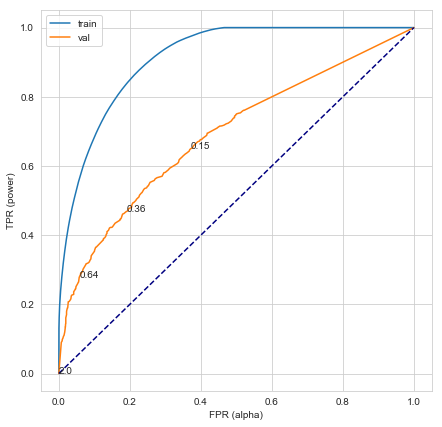

In [394]:
scores(class_tree , X_train , X_val , y_train , y_val)
roc_plot(class_tree , X_train , y_train , X_val , y_val)

# Feature Importance By Decision Tree

In [400]:
# features = df.drop('default' , 1)

In [433]:
def plot_features(model , figsize):
    feat_importance = pd.Series(model.feature_importances_ , index = features.columns)
    ax.set_ylabel("features" , size = 16);
    feat_importance.nlargest(10).sort_values().plot(kind = "barh" , figsize = (10 , 5))
    plt.xlabel("Relative Feature Importance For Random Forest");
    plt.title("Feature Importance In Order" , size = 16);

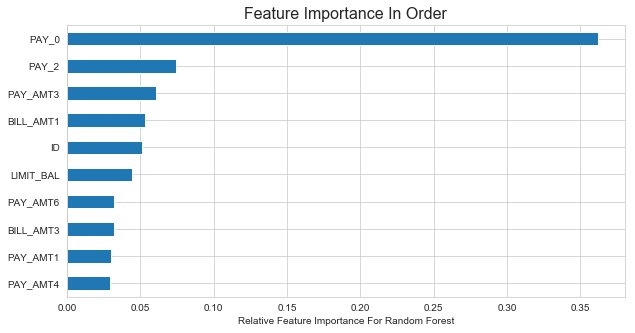

In [434]:
plot_features(class_tree , (8,8))

# Feature Importance Random Forest Model _ BaselineModel

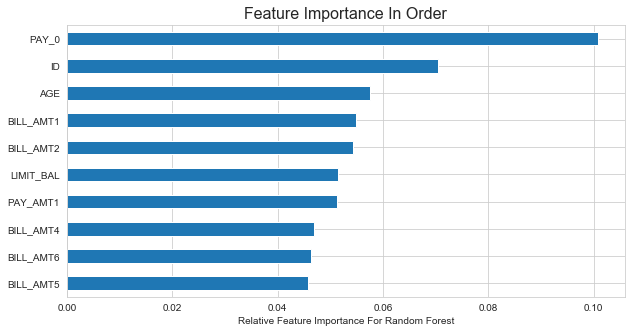

In [432]:
plot_features(rf_model , (8,8))

# Wikipedia WordCloud Image for Readme - Create into Function Later

In [441]:
import wikipedia
from PIL import Image
from wordcloud import WordCloud, STOPWORDS


In [ ]:
x = str(input("entre title : "))
title = wikipedia.search(x)[0]
page = wikipedia.page(title)
text = page.content
"""Print wikipedia search result"""
print(text)

background = np.array(Image.open("cloud.png"))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white' , max_words=200 , mask = background , stopwords=stopwords)
wc.generate(text)
"""save wikipedia file result"""
wc.to_file('default.png')

# <a id="7">NaiveBayesClassifier:</a>

In [464]:
# import estimator model
from sklearn.naive_bayes import GaussianNB

In [ ]:
#create an instance for the model


# Watch this Space Sat 14th March 2020